In [48]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.filters import sobel

import cv2
from imutils.perspective import four_point_transform
from imutils import contours
import imutils

%matplotlib inline

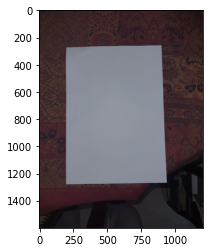

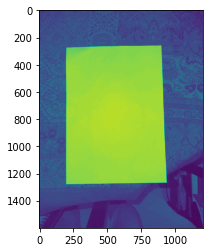

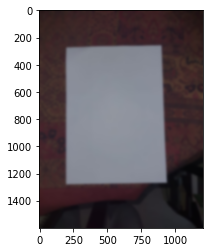

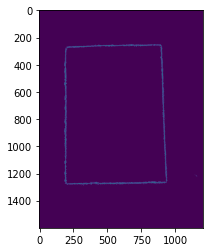

In [3]:
im = io.imread('paper.jpeg')
plt.figure()
plt.imshow(im)

gray = rgb2gray(im)
plt.figure()
plt.imshow(gray)

#edge_canny = canny(gray,sigma=4)
#plt.figure()
#plt.imshow(edge_canny)


blurred = cv2.GaussianBlur(im, (0, 0), 8)
blurred = np.uint8(blurred)
plt.figure()
plt.imshow(blurred)
canny_edge = cv2.Canny(blurred, 15, 25)

plt.figure()
plt.imshow(canny_edge)

cnts = cv2.findContours(canny_edge.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None

# ensure that at least one contour was found
if len(cnts) > 0:
    # sort the contours according to their size in
    # descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # loop over the sorted contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            docCnt = approx
            break

            

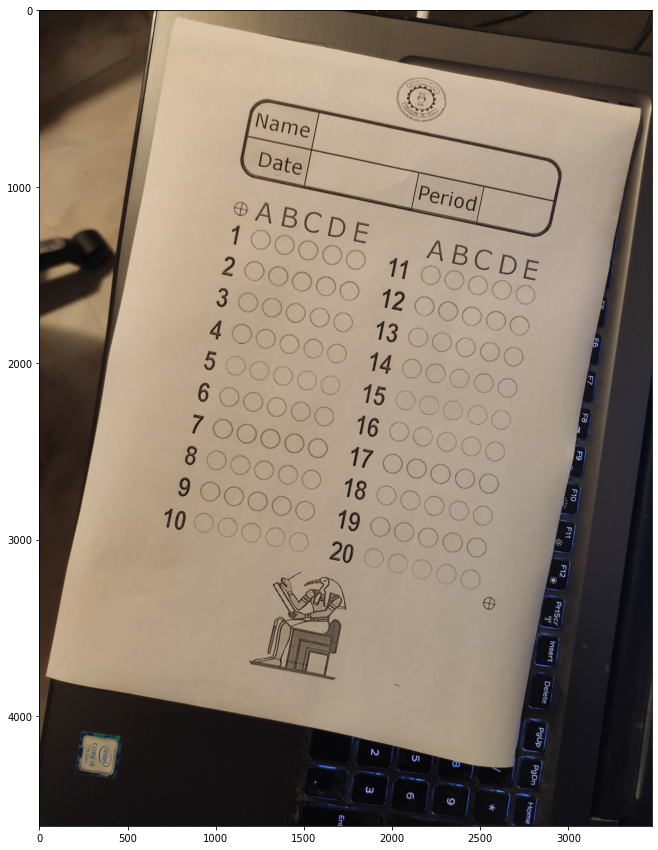

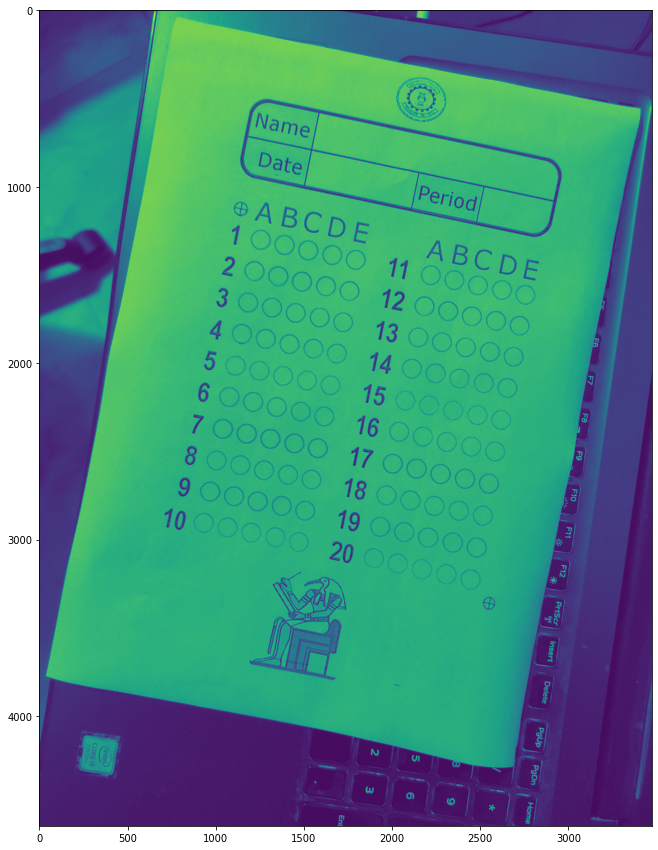

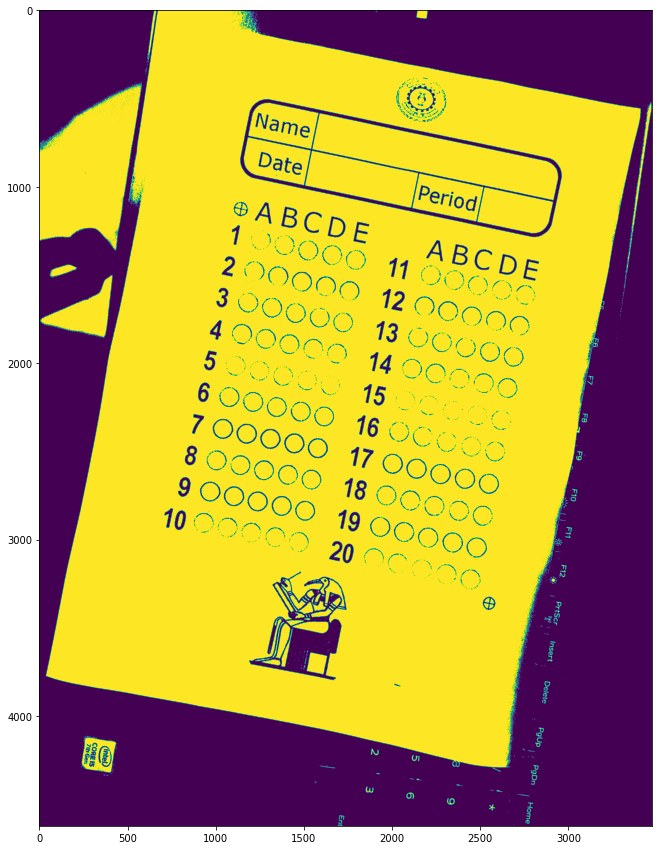

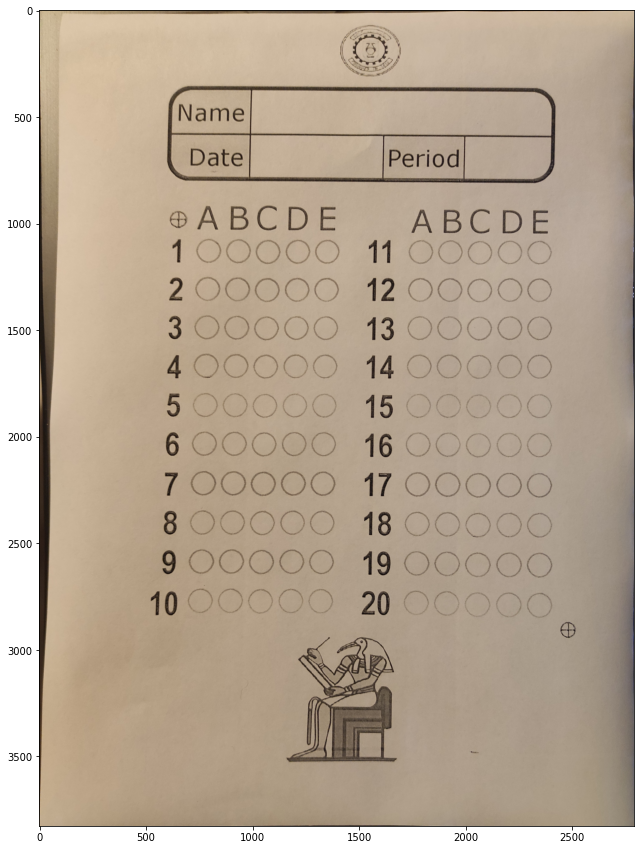

In [69]:
def removeShadow(img):
    rgb_planes = cv2.split(img)

    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)

    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    return result

def perspective_correction(image):

    # load the image, convert it to grayscale, blur it
    # slightly, then find edges

    gray = np.uint8(rgb2gray(image)*256)
    ret,binary = cv2.threshold(gray,125,255,cv2.THRESH_BINARY)

    # find contours in the edge map, then initialize
    # the contour that corresponds to the document
    cnts = cv2.findContours(binary, cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    
    cnts = cnts[0] if len(cnts)==2 else cnts[1]

    docCnt = None
    # ensure that at least one contour was found
    if len(cnts) > 0:
        # sort the contours according to their size in
        # descending order
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        # loop over the sorted contours
        for c in cnts:
            # approximate the contour
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            # if our approximated contour has four points,
            # then we can assume we have found the paper
            if len(approx) == 4:
                x,y = image.shape[:2]
                #print(approx.shape)
                if peri > (x+y)*2/8: 
                    #checking if contour length is bigger than the original image's length/4
                    paper = four_point_transform(image, approx.reshape(4, 2))
                    return paper, True

    return None, False
    
    
    
pap = io.imread('1.jpg')

plt.figure(figsize=(15, 15))
plt.imshow(pap)

pap, flag = perspective_correction(pap)
if flag:
    plt.figure(figsize=(15, 15))
    plt.imshow(pap);

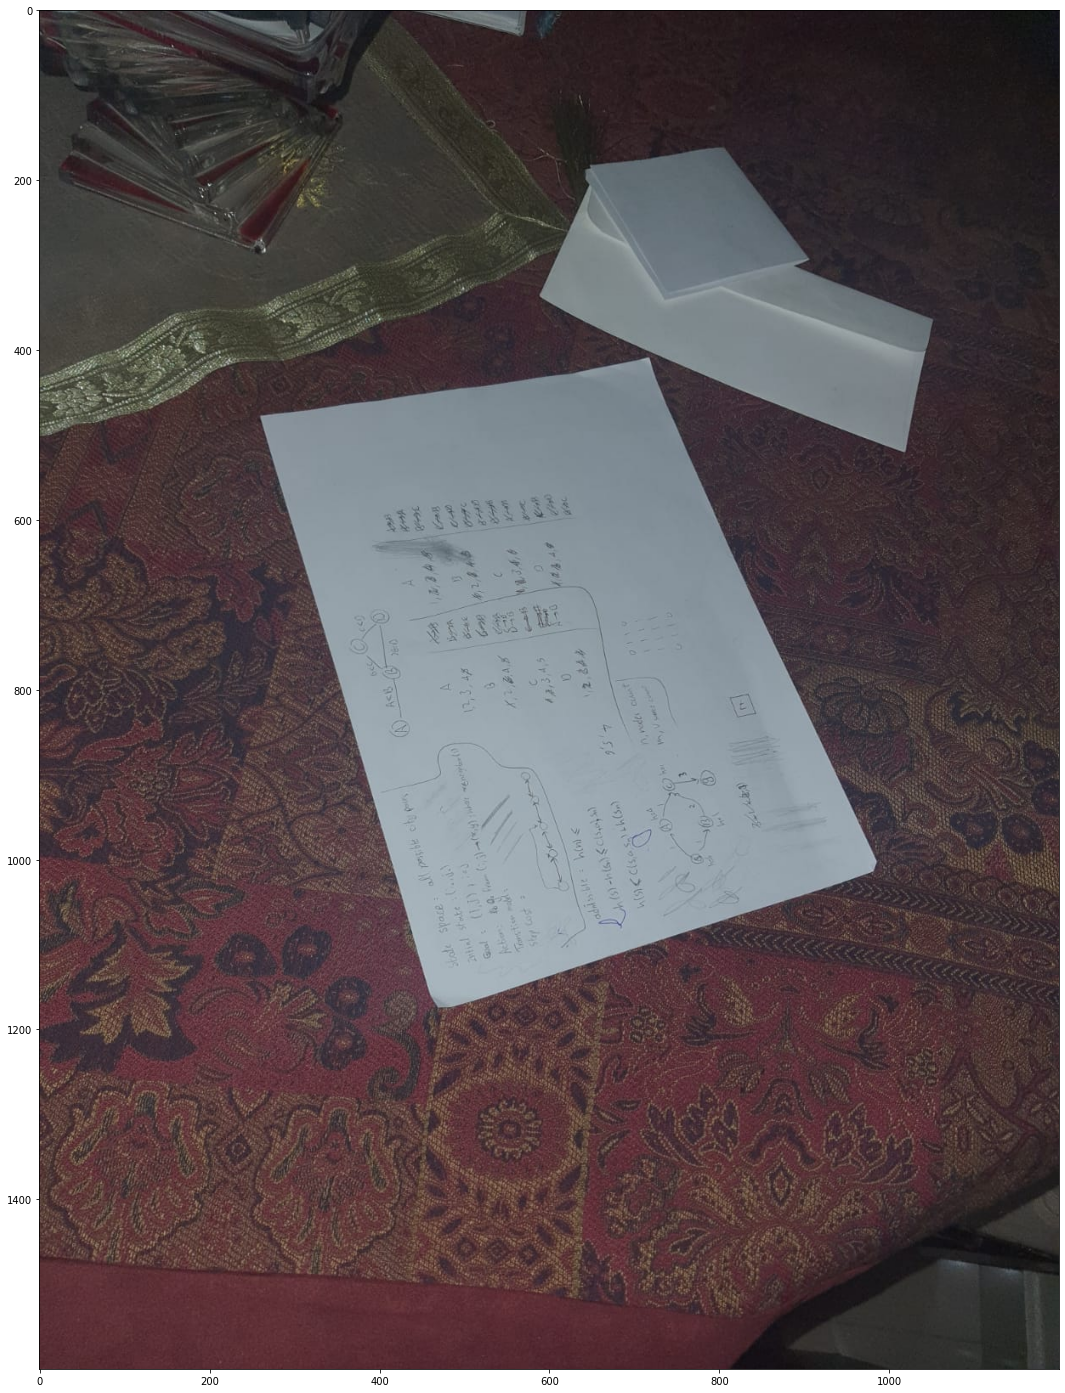

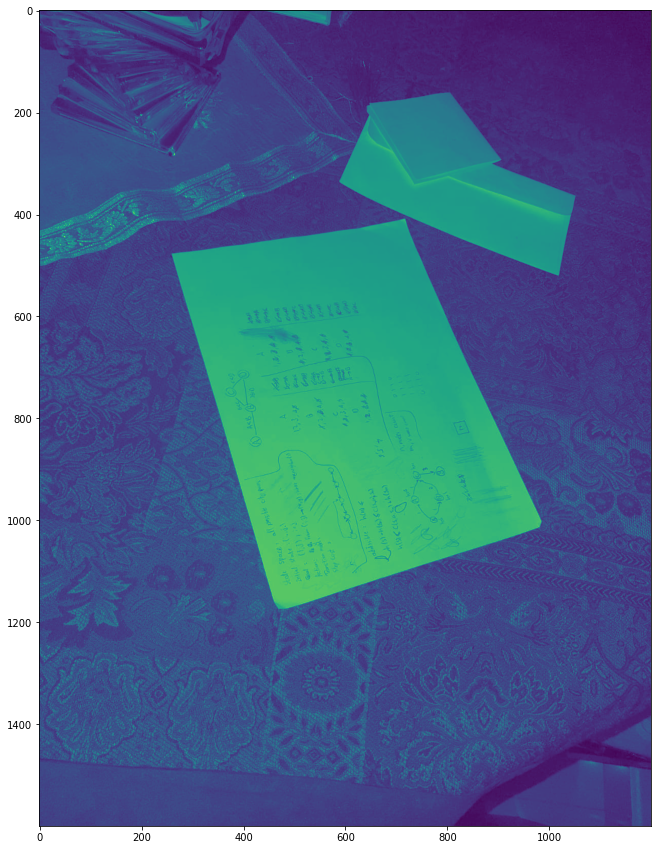

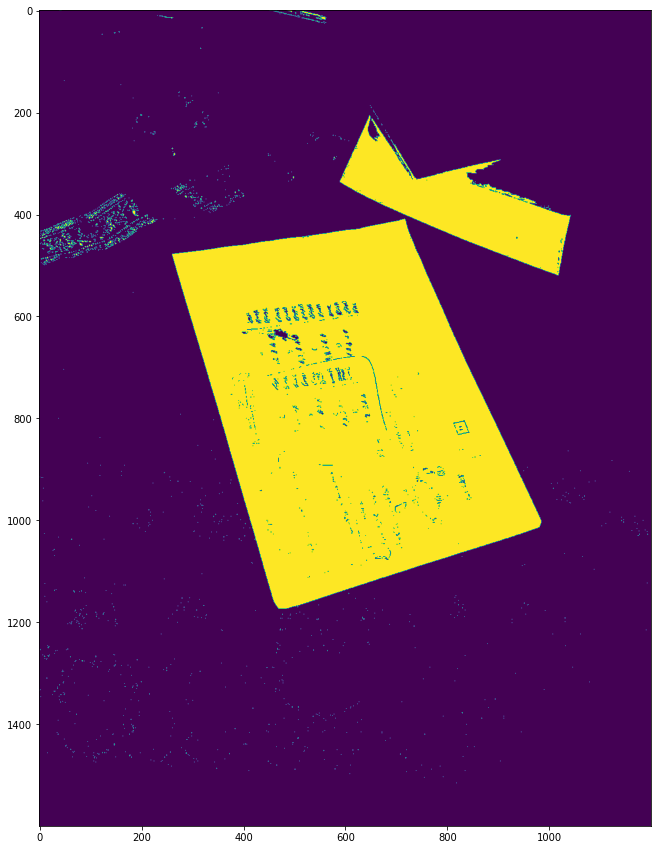

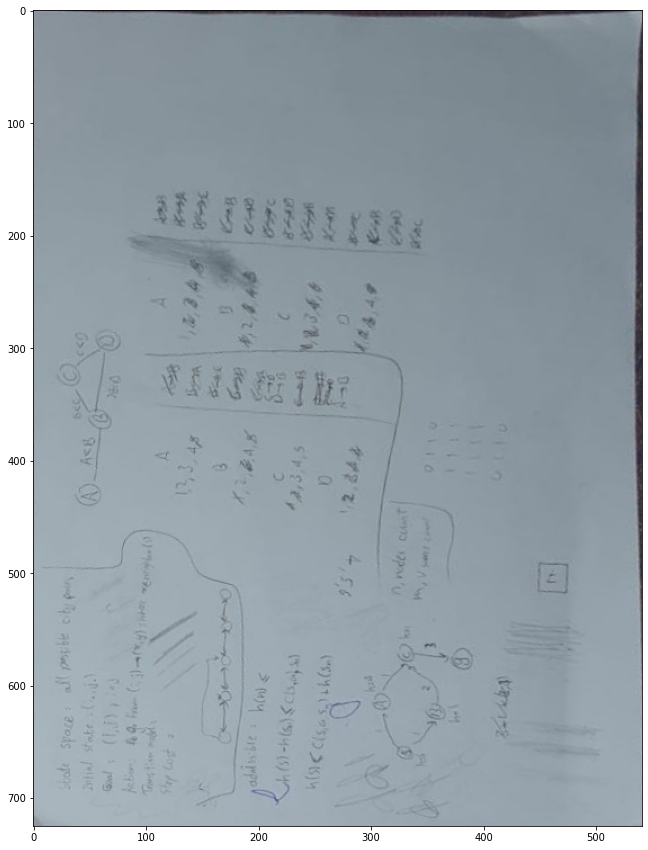

In [70]:
pap = io.imread('pp1.jpeg')

plt.figure(figsize=(25, 25))
plt.imshow(pap)

pap, flag = perspective_correction(pap)
if flag:
    plt.figure(figsize=(15, 15))
    plt.imshow(pap);

In [ ]:
from skimage.morphology import binary_dilation, binary_erosion
from skimage.color import rgb2gray,rgb2hsv, rgba2rgb

pap = io.imread('pp.png')
plt.figure(figsize=(25, 25))
plt.imshow(pap)


pap = rgb2gray(pap)
im = np.invert(im)
plt.figure(figsize=(25, 25))
io.imshow(pap)

for _ in range(1):
    pap = binary_erosion(pap, [[0,1,1,0],[1,1,1,1],[1,1,1,1],[0,1,1,0]])

plt.figure(figsize=(25, 25))
io.imshow(pap)

pap = perspective_correction(pap)
plt.figure(figsize=(15, 15))
plt.imshow(pap);